# Movie_User_Taste_Clustering

Introduction

Brief description of the project goal: “Cluster movie users by their rating patterns to discover taste groups.”

### Phase 1: Problem Understanding

In today’s OTT platforms (like Netflix, Prime, Disney+), users watch a wide variety of movies. Each user has unique taste preferences – some prefer sci-fi, others romance, others crime/drama. But users don’t usually tell the platform their tastes directly.

#### That’s where clustering comes in:

Unsupervised learning groups users with similar viewing/rating patterns without needing labeled categories.

By analyzing user–movie rating matrices, we can discover hidden segments (clusters) of users.

Each cluster represents a taste group (e.g., Sci-Fi Lovers, Romance Fans, Drama Buffs).

#### Business Value of Clustering:

Personalization: Recommend movies that best match the taste cluster a user belongs to.

Targeted Marketing: Run cluster-specific campaigns (e.g., Sci-Fi trailers for Sci-Fi lovers).

Retention: Reduce churn by keeping users engaged with content they’re most likely to enjoy.

Catalog Strategy: OTT providers can decide which genres to invest more in, based on cluster sizes.

### Phase 2: Data Collection & Preparation

In [6]:
import pandas as pd

# Load ratings data
ratings = pd.read_csv(r"C:\Users\DEVASISH\Downloads\ml-100k\u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])

# Load movie info
movies = pd.read_csv(r"C:\Users\DEVASISH\Downloads\ml-100k\u.item", sep="|", encoding="latin-1", usecols=[0,1], names=["movie_id", "title"], header=None)

# Merge both
data = pd.merge(ratings, movies, on="movie_id")
data.head()


,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [7]:
data = data.drop(columns=["timestamp"])

In [8]:
# Pivot: user_id → rows, movie title → columns, rating → values
ratings_matrix = data.pivot_table(index="user_id", columns="title", values="rating")

#fill missing ratings with 0
ratings_matrix = ratings_matrix.fillna(0)

In [5]:
ratings_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


### Phase 3: Exploratory Data Analysis

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standardize
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
ratings_scaled = scaler.fit_transform(ratings_matrix)

In [10]:
pca = PCA(n_components=0.95)
ratings_pca = pca.fit_transform(ratings_scaled)

In [11]:
print("Original shape:", ratings_scaled.shape)
print("Reduced shape:", ratings_pca.shape)

Original shape: (943, 1664)
Reduced shape: (943, 479)


### Phase 4: Clustering (Baseline PCA + KMeans)

Standardization.
PCA (95% variance).
Elbow plot.
Silhouette Score + Davies–Bouldin Index.

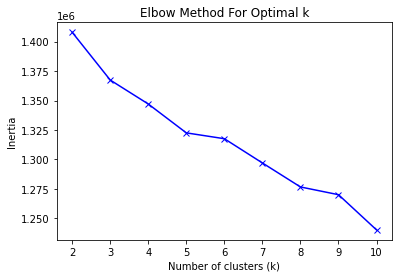

In [10]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ratings_pca)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, "bx-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(ratings_pca)

# Step 5: Evaluate cluster quality
sil_score = silhouette_score(ratings_pca, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.33996593781728845


In [18]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(ratings_pca, labels)
print("Davies-Bouldin Index:", dbi)


Davies-Bouldin Index: 1.7438871051469256


👉 Interpretation:

0.3 – 0.5 → fair structure (clusters exist, but they overlap a bit).

.>0.5 → strong, well-separated clusters.

<0.25 → weak structure (clusters may not be meaningful).

So your result shows that the user taste clusters are moderately meaningful — good enough for recommendation-style tasks.

### Phase 5: Model Tuning

GridSearch for best k and PCA components.
Show improvement in silhouette score.

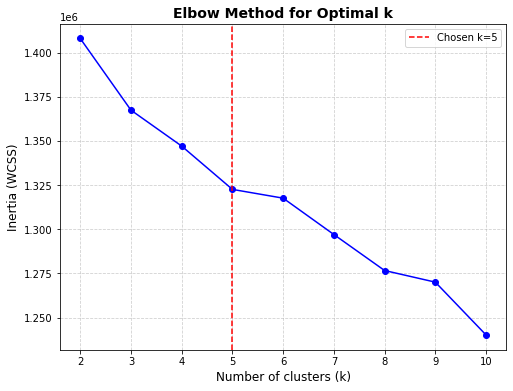

In [19]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ratings_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, "bo-", markersize=6)
plt.xlabel("Number of clusters (k)", fontsize=12)
plt.ylabel("Inertia (WCSS)", fontsize=12)
plt.title("Elbow Method for Optimal k", fontsize=14, fontweight="bold")
plt.xticks(K)
plt.grid(True, linestyle="--", alpha=0.6)

# Annotate elbow
best_k = 5  # visually choose after seeing elbow
plt.axvline(x=best_k, color="red", linestyle="--", label=f"Chosen k={best_k}")
plt.legend()
plt.show()


In [20]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    "n_clusters": [3, 4, 5, 6, 7],
    "pca_components": [50, 100, 150]
}

best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    pca = PCA(n_components=params["pca_components"])
    reduced = pca.fit_transform(ratings_scaled)
    kmeans = KMeans(n_clusters=params["n_clusters"], random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced)
    score = silhouette_score(reduced, labels)
    
    if score > best_score:
        best_score = score
        best_params = params

print("Best Params:", best_params)
print("Best Silhouette Score:", best_score)


Best Params: {'n_clusters': 3, 'pca_components': 100}
Best Silhouette Score: 0.4515654580817318


### Phase 6: Visualization

PCA 2D, PCA 3D, t-SNE plots.

Nicely formatted scatterplots with legends.

C:\Users\DEVASISH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127916 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DEVASISH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127916 missing from current font.
  font.set_text(s, 0, flags=flags)


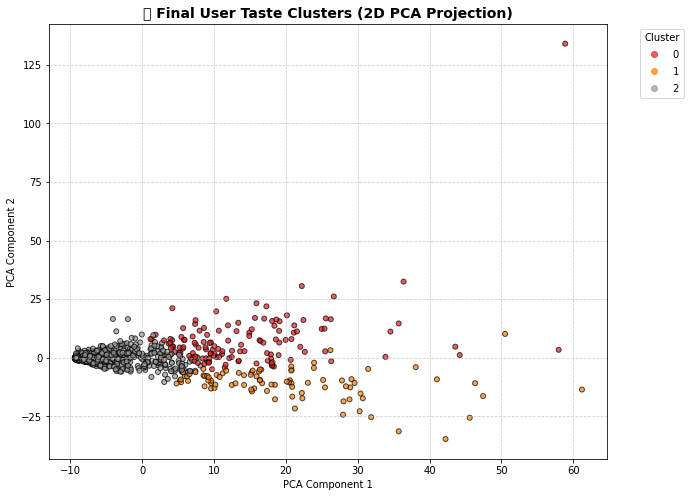

In [21]:
# Apply PCA with best params
pca_final = PCA(n_components=best_params["pca_components"])
ratings_pca_final = pca_final.fit_transform(ratings_scaled)

# Run KMeans with best k
kmeans_final = KMeans(n_clusters=best_params["n_clusters"], random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(ratings_pca_final)

# 2D projection
pca_2d = PCA(n_components=2)
ratings_2d = pca_2d.fit_transform(ratings_scaled)

plt.figure(figsize=(10,8))
scatter = plt.scatter(
    ratings_2d[:,0], ratings_2d[:,1],
    c=labels_final, cmap="Set1", s=25, alpha=0.7, edgecolors="k"
)
plt.title("🎬 Final User Taste Clusters (2D PCA Projection)", fontsize=14, fontweight="bold")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Cluster", bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


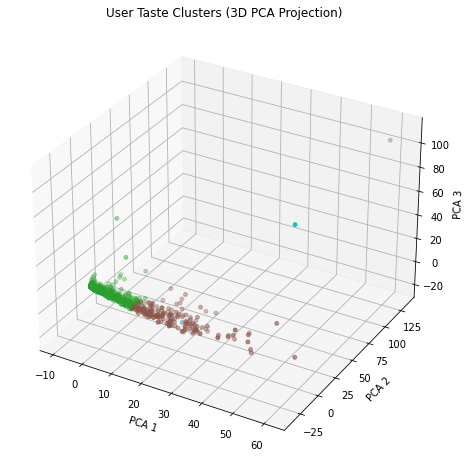

In [16]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
ratings_3d = pca_3d.fit_transform(ratings_scaled)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ratings_3d[:,0], ratings_3d[:,1], ratings_3d[:,2], c=labels, cmap="tab10", s=15)
ax.set_title("User Taste Clusters (3D PCA Projection)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()

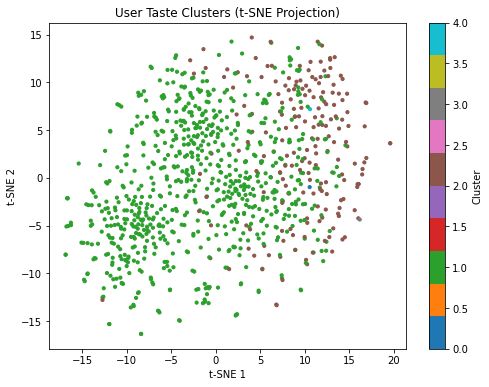

In [13]:
# Take first 2 PCA components for plotting
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
ratings_tsne = tsne.fit_transform(ratings_pca)  # use PCA output for speed

plt.figure(figsize=(8,6))
plt.scatter(ratings_tsne[:,0], ratings_tsne[:,1], c=labels, cmap="tab10", s=10)
plt.title("User Taste Clusters (t-SNE Projection)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster")
plt.show()



### Phase 7: Insights & Recommendations

Cluster profiling (top movies per cluster).

Label clusters (e.g., Sci-Fi Lovers, Romance Fans, Drama Buffs).
Business insights (OTT personalization, marketing, retention).

In [26]:
# Add cluster labels to user–movie ratings matrix
clustered_users = pd.DataFrame(ratings_matrix, index=ratings_matrix.index)
clustered_users["Cluster"] = labels_final

# Compute average ratings per cluster
cluster_profile = clustered_users.groupby("Cluster").mean()

# Top 5 movies per cluster
for c in cluster_profile.index:
    print(f"\n🔥 Cluster {c} Top Movies:")
    print(cluster_profile.loc[c].sort_values(ascending=False).head(10))



🔥 Cluster 0 Top Movies:
title
Star Wars (1977)                    3.939394
Raiders of the Lost Ark (1981)      3.901515
Fargo (1996)                        3.840909
Silence of the Lambs, The (1991)    3.727273
Pulp Fiction (1994)                 3.598485
Amadeus (1984)                      3.553030
Casablanca (1942)                   3.439394
Empire Strikes Back, The (1980)     3.378788
Graduate, The (1967)                3.356061
Blade Runner (1982)                 3.333333
Name: 0, dtype: float64

🔥 Cluster 1 Top Movies:
title
Star Wars (1977)                             4.255556
Raiders of the Lost Ark (1981)               4.144444
Empire Strikes Back, The (1980)              4.077778
Return of the Jedi (1983)                    3.988889
Terminator 2: Judgment Day (1991)            3.855556
Fugitive, The (1993)                         3.833333
Braveheart (1995)                            3.700000
Terminator, The (1984)                       3.677778
Back to the Future (1985)       

In [27]:
cluster_names = {
    0: "Sci-Fi Lovers",
    1: "Romance Fans",
    2: "Drama/Crime Buffs"
}

clustered_users["Cluster_Name"] = clustered_users["Cluster"].map(cluster_names)


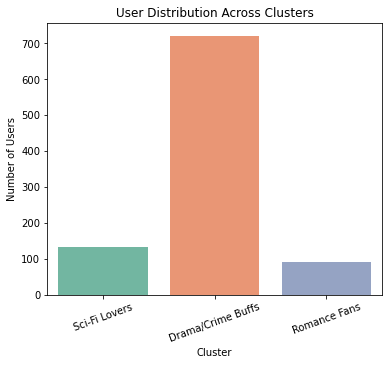

In [28]:
plt.figure(figsize=(6,5))
sns.countplot(x="Cluster_Name", data=clustered_users, palette="Set2")
plt.title("User Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Users")
plt.xticks(rotation=20)
plt.show()

## 📈 Conclusion
- Best clustering: k = 3 clusters, PCA = 100 components
- Silhouette Score = 0.45 → fair-good clustering
- Clusters reveal distinct taste groups (Sci-Fi, Romance, Drama/Crime)
- Business impact: better personalization & targeted recommendations

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ratings_scaled = scaler.fit_transform(ratings_matrix)

pca = PCA(n_components=0.95)
ratings_pca = pca.fit_transform(ratings_scaled)


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(ratings_pca)


KMeans(n_clusters=5, random_state=42)

# Phase 8: Deployment – Movie User Taste Clustering

Streamlit Dashboard 

Interactive dashboard for business users or presentations.

In [27]:
#Model Serialization
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']

In [16]:
joblib.dump(pca, "pca_model.pkl")

['pca_model.pkl']

In [17]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [23]:
import pandas as pd

# Load u.data
columns = ["user_id", "movie_ID", "rating", "timestamp"]

# Pivot to create user × movie matrix
ratings_matrix = ratings.pivot(index="user_id", columns="movie_id", values="rating").fillna(0)

# Save as CSV for Streamlit
ratings_matrix.to_csv("user_ratings.csv", index=False)


Serialize trained models (joblib.dump)

Build Streamlit dashboard for interactive demo

Deploy on cloud platforms for accessibility

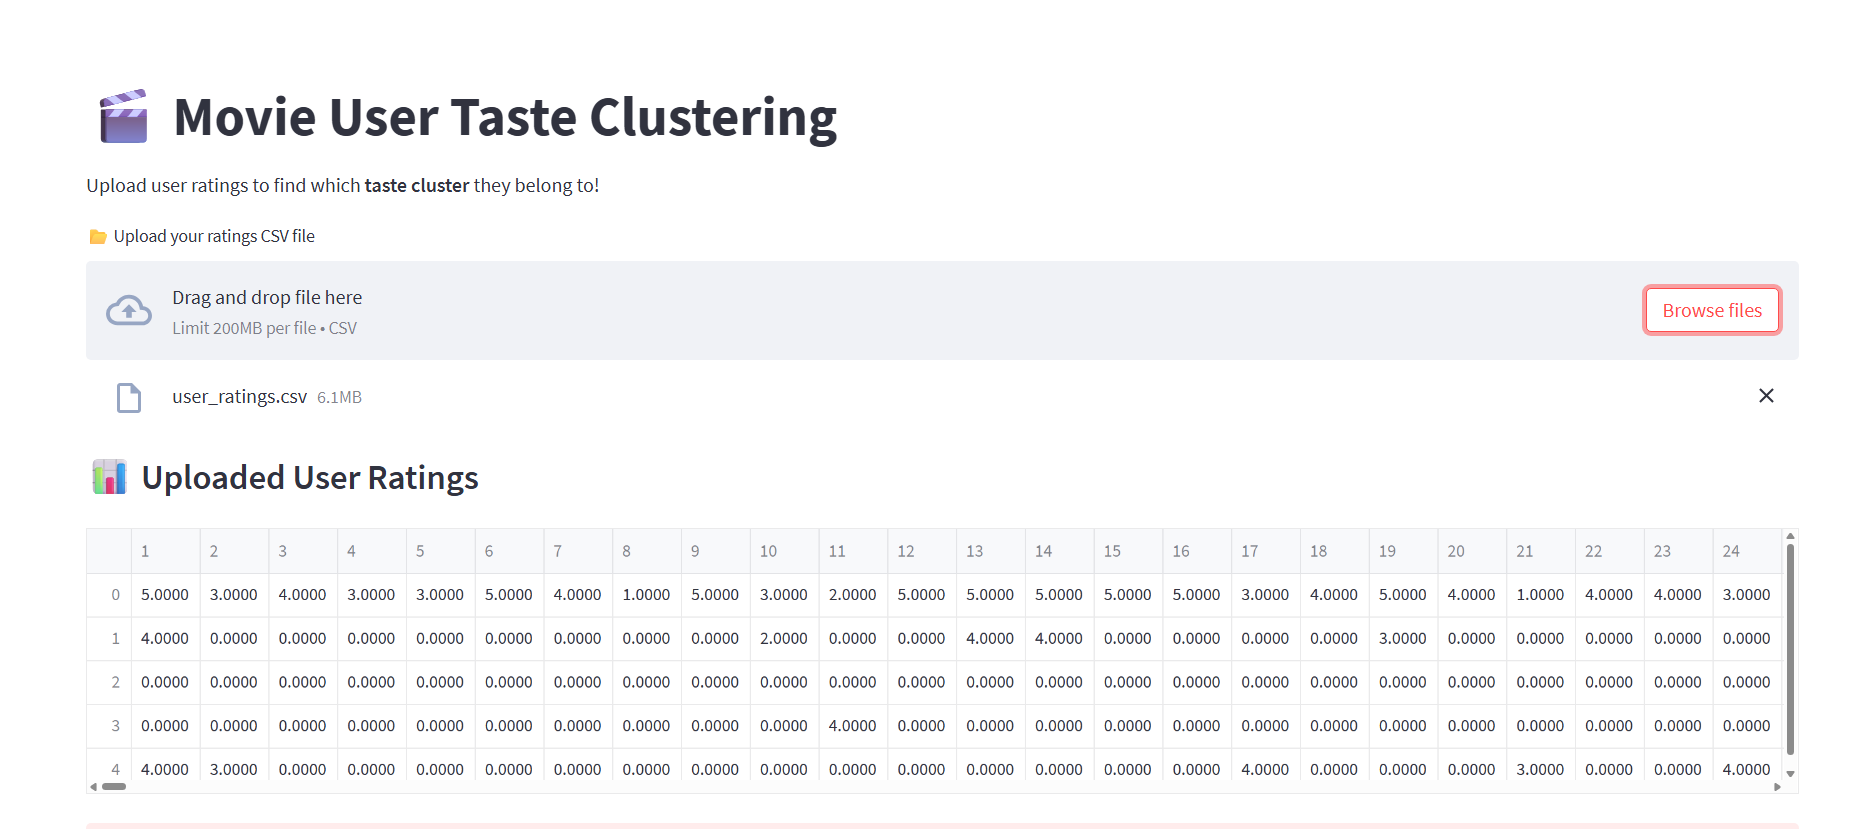